In [55]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time

# scikit-learn libraries
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

# formating the notebook
pd.set_option('display.max_columns', None)

In [56]:
# import the data
data = pd.read_excel('/content/drive/MyDrive/Rotten_Tomatoes_Movies3.xls')
data.shape

(16638, 16)

In [57]:
data.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [58]:
data.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,15823,16636,16483.000000,16638.000000,16638.000000,16386.000000
mean,1999-10-24 22:10:52.973519488,2008-08-13 13:35:49.266650624,102.391494,60.466522,56.607104,60.470829
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.000000
25%,1993-03-29 00:00:00,2003-01-28 00:00:00,90.000000,38.000000,12.000000,45.000000
50%,2006-08-04 00:00:00,2008-04-08 00:00:00,99.000000,66.000000,28.000000,62.000000
75%,2013-06-28 00:00:00,2014-05-12 00:00:00,111.000000,86.000000,76.000000,77.000000
max,2019-12-07 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.000000
std,NaN,NaN,25.028011,28.587230,66.383800,20.462368


In [59]:
print(f'Content Rating category: {data.rating.unique()}')

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'PG-13)' 'NC17' 'R)']


In [60]:
#fixing inconsistency and incorrect format
rating_map = {
    'PG': 'PG',
    'R': 'R',
    'NR': 'NR',
    'G': 'G',
    'PG-13': 'PG-13',
    'PG-13)': 'PG-13',  # Fix inconsistency
    'NC17': 'NC-17',    # Correct inconsistent format
    'R)': 'R'           # Fix inconsistency
}
data['rating'] = data['rating'].map(rating_map)

In [61]:
print(f'Content Rating category: {data.rating.unique()}')

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC-17']


[Text(0, 0, '6137'),
 Text(0, 0, '4862'),
 Text(0, 0, '2888'),
 Text(0, 0, '2062'),
 Text(0, 0, '652'),
 Text(0, 0, '37')]

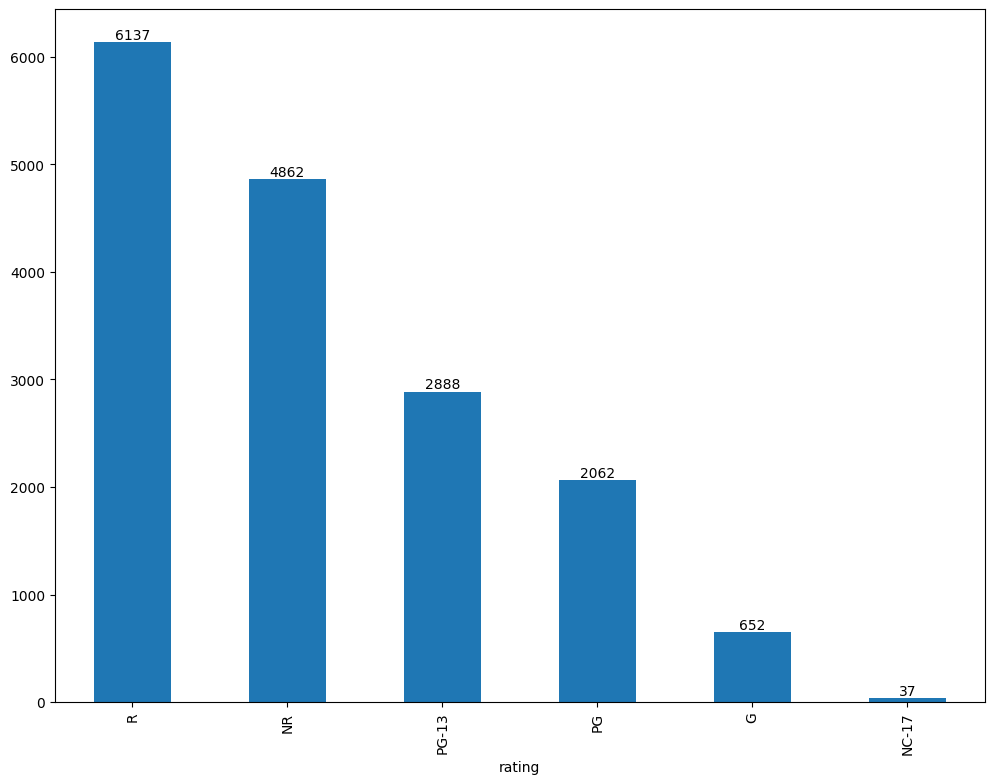

In [62]:
ax = data.rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

Content Rating category: ['PG' 'R' 'NR' 'G' 'PG-13' 'NC-17']


[Text(0, 0, '6137'),
 Text(0, 0, '4862'),
 Text(0, 0, '2888'),
 Text(0, 0, '2062'),
 Text(0, 0, '652'),
 Text(0, 0, '37')]

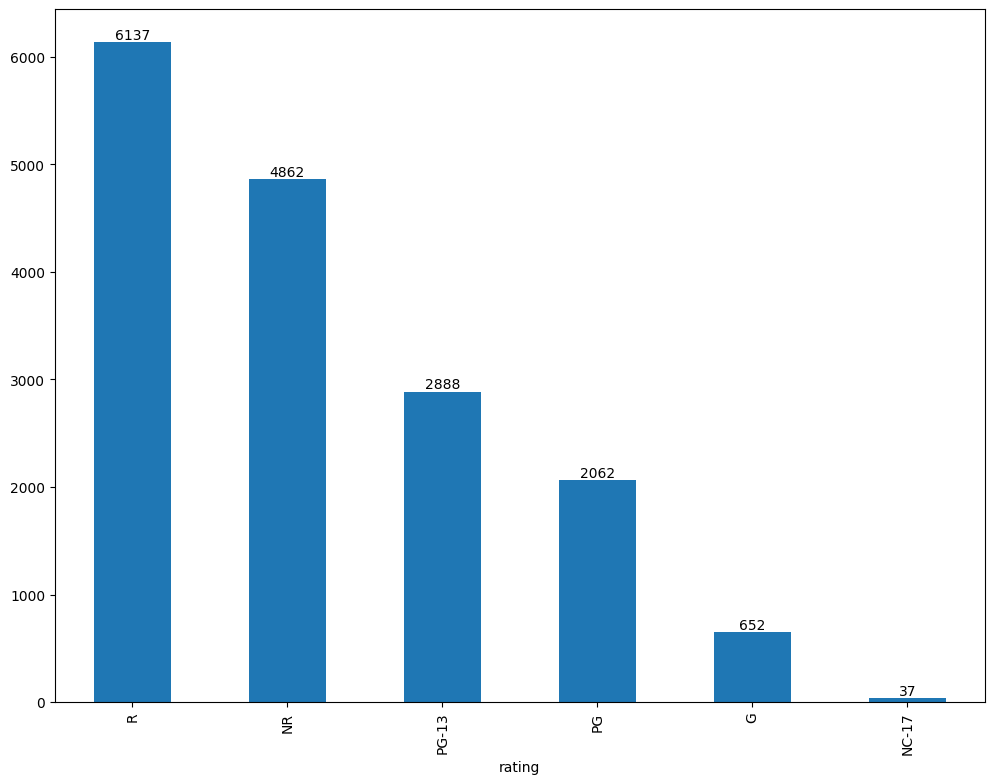

In [63]:
print(f'Content Rating category: {data.rating.unique()}')
ax = data.rating.value_counts().plot(kind='bar', figsize=(12,9))
ax.bar_label(ax.containers[0])

In [64]:
content_rating = pd.get_dummies(data.rating)
content_rating.head()

,G,NC-17,NR,PG,PG-13,R
0,False,False,False,True,False,False
1,False,False,False,False,False,True
2,False,False,False,False,False,True
3,False,False,True,False,False,False
4,True,False,False,False,False,False


In [65]:
# Encode tomatometer status variable with ordinal encoding
tomatometer_status = pd.DataFrame(data.tomatometer_status.replace(['Rotten','Fresh','Certified-Fresh'],[0,1,2]))
tomatometer_status

,tomatometer_status
0,0
1,Certified Fresh
2,1
3,Certified Fresh
4,1
...,...
16633,0
16634,Certified Fresh
16635,1
16636,1


In [66]:
#data cleaning

In [67]:
# Check for missing values
data.isnull().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


In [68]:
df=data
# Convert date columns to datetime
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')
df['on_streaming_date'] = pd.to_datetime(df['on_streaming_date'], errors='coerce')

# Fill missing numeric values with median
df['audience_rating'].fillna(df['audience_rating'].median(), inplace=True)

# Drop rows with missing required fields
df.dropna(subset=['movie_title', 'rating', 'tomatometer_status', 'tomatometer_rating', 'tomatometer_count'], inplace=True)

# Display the cleaned dataset
df.head()

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0


In [69]:
#eda

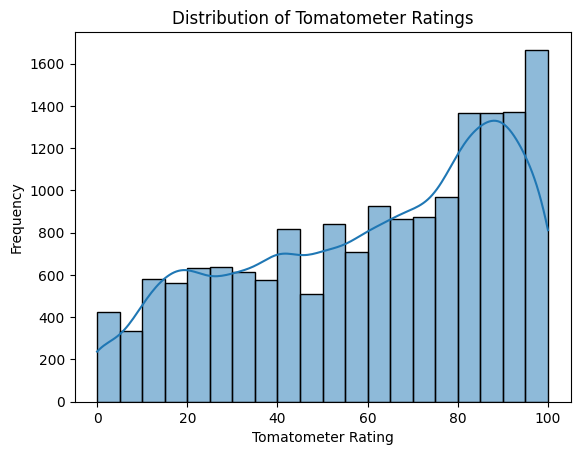

In [70]:
# Distribution of tomatometer ratings
sns.histplot(df['tomatometer_rating'], bins=20, kde=True)
plt.title('Distribution of Tomatometer Ratings')
plt.xlabel('Tomatometer Rating')
plt.ylabel('Frequency')
plt.show()

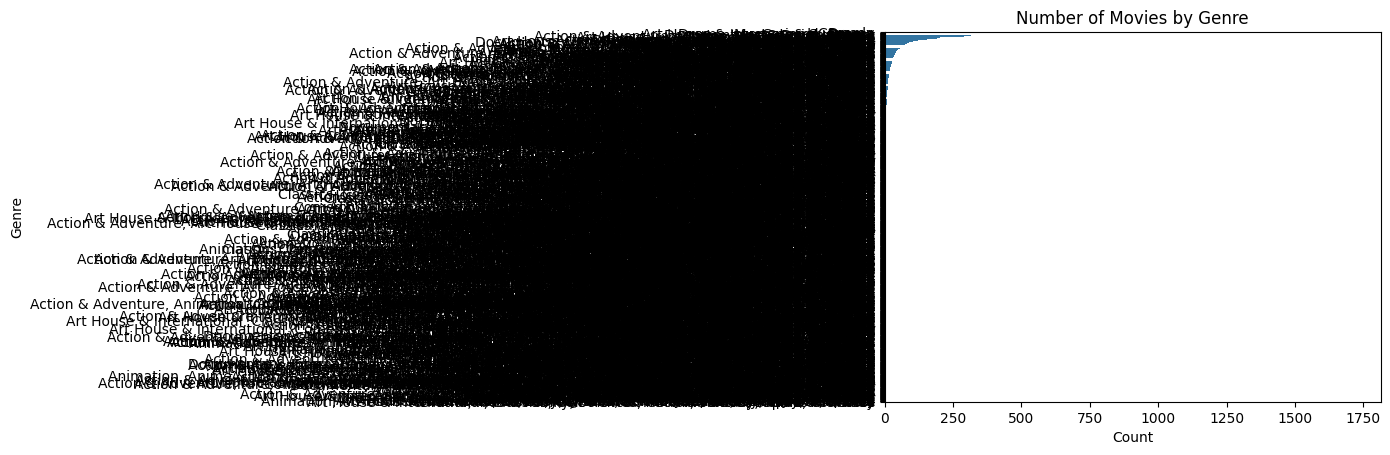

In [71]:
# Count plot of genres
sns.countplot(y='genre', data=df, order=df['genre'].value_counts().index)
plt.title('Number of Movies by Genre')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

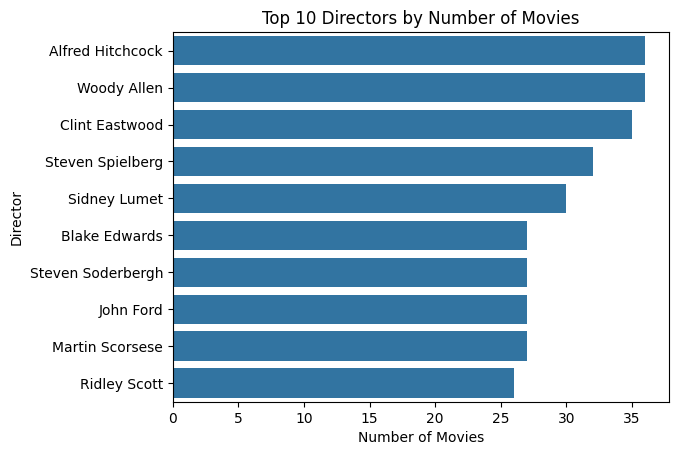

In [72]:
# Top 10 directors by number of movies
top_directors = df['directors'].value_counts().head(10)
sns.barplot(x=top_directors.values, y=top_directors.index)
plt.title('Top 10 Directors by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')
plt.show()

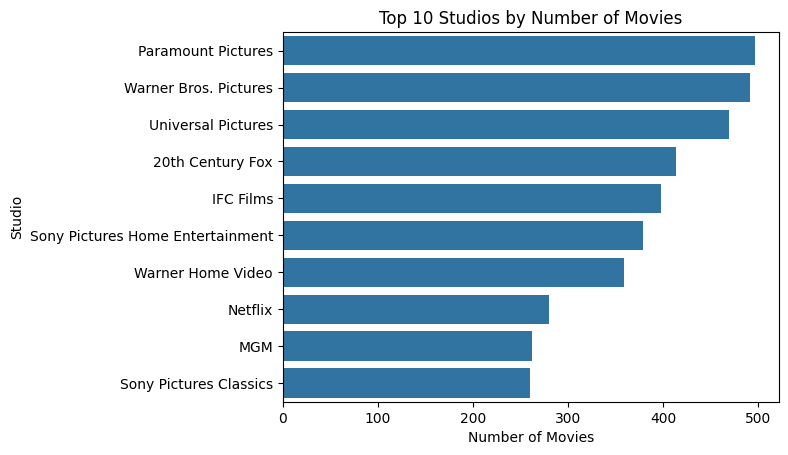

In [73]:
# Top 10 studios by number of movies
top_studios = df['studio_name'].value_counts().head(10)
sns.barplot(x=top_studios.values, y=top_studios.index)
plt.title('Top 10 Studios by Number of Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Studio')
plt.show()

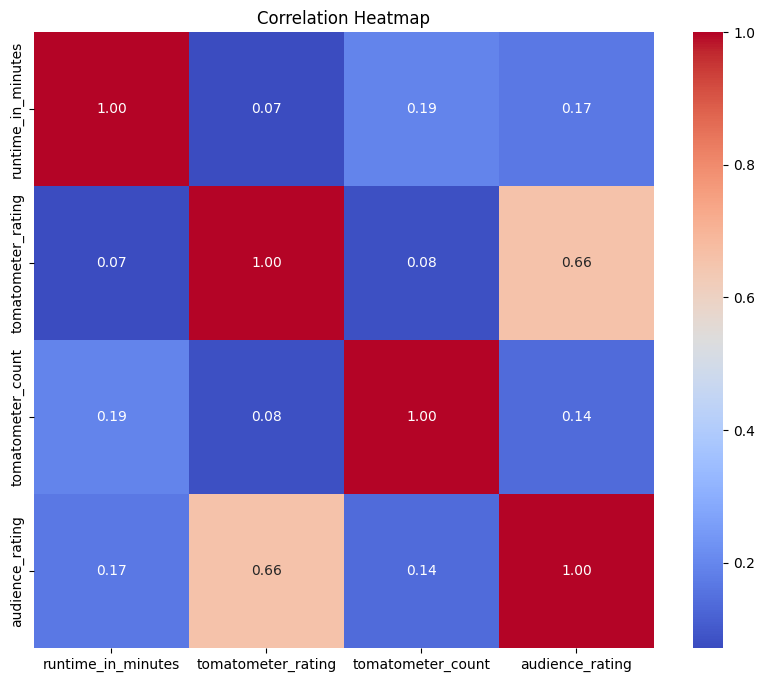

In [74]:
# Select numeric columns for correlation
numeric_df = df.select_dtypes(include=[np.number])

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Prepare data for modeling
X = df[['tomatometer_rating', 'tomatometer_count', 'audience_rating']]
y = df['tomatometer_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9927884615384616

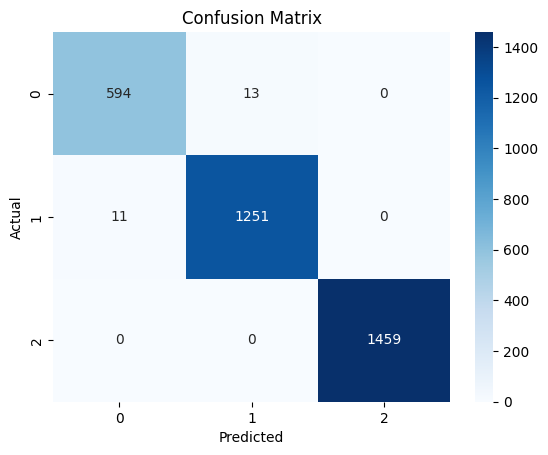

In [76]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()